# Physics 5300 Final Project

This note book contains the simulation for Double (and more) Pendulum and Gravitational orbits in Cartesian coordinates.

## Euler-Lagrange equation for first problem

For a double pendulum system, the Lagrangian with generalized coordinate $\phi$ is

$\begin{align}
  \mathcal{L} = \frac12 (m_1 + m_2) L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1\dot\phi_2 cos(\phi_1-\phi_2)+ \frac12 m_2 L_2^2 \dot\phi_2^2 - (m_1 + m_2) g L_1 (1 - cos\phi_1)-m_2 g L_2 (1 - cos\phi_2)
\end{align}$

The Euler-Lagrange equation is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \frac{\partial\mathcal L}{\partial\phi_1}
 \quad\Longrightarrow\quad
(m_1 + m_2) L_1^2 \ddot\phi_1 + m_2 L_1 L_2 \ddot\phi_2 cos(\phi_2 - \phi_1) - m_2 L_1 L_2 \dot\phi_2^2 sin(\phi_2-\phi_1) + (m_1 + m_2) g L_1 sin\phi_1 = 0
  \;
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = \frac{\partial\mathcal L}{\partial\phi_2}
 \quad\Longrightarrow\quad
m_2 L_2^2 \ddot\phi_2 + m_2 L_1 L_2 \ddot\phi_1 cos(\phi_2 - \phi_1) + m_2 L_1 L_2 \dot\phi_1^2 sin(\phi_2 - \phi_1) + m_2 g L_2 sin\phi_2 = 0
  \;
\end{align}$


After rearrange and cancelation:

$\begin{align}
(m_1 + m_2) (L_1 \ddot\phi_1 + g sin\phi_1) = m_2 L_2 \dot\phi_2^2 sin(\phi_2 - \phi_1) - m_2 L_2 \ddot\phi_2 cos(\phi_2 - \phi_1)                  \space\space\space\space\space (1)  
  \;
\end{align}$

$\begin{align}
L_1 \ddot\phi_1 cos(\phi_2 - \phi_1) + L_1 \dot\phi_1^2 sin(\phi_2 - \phi_1) = - g sin \phi_2 - L_2 \ddot\phi_2  \space\space\space\space\space (2)
  \;
\end{align}$


In [2]:
%matplotlib inline

In [3]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Double Pendulum Simulation

In [22]:
class LagrangianDoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L : float
        length of the simple pendulum
    g : float
        gravitational acceleration at the earth's surface
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    mass : float
        mass of pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1.,L2=1., m1=1.,m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g

    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi_1(t) and y[1] = dphi_1/dt
                                      y[2] = phi_2(t) and y[3] = dphi_2/dt
            
        Returns
        -------
        
        """      
        phi_1, y1, phi_2, y2 = y  #input for initial condition


      
        y1dot = (self.m2*self.g*np.sin(phi_2)*np.cos(phi_1-phi_2) - self.m2*np.sin(phi_1-phi_2)*(self.L1*y1**2*np.cos(phi_1-phi_2) + self.L2*y2**2) -
             (self.m1+self.m2)*self.g*np.sin(phi_1)) / self.L1 / (self.m1 + self.m2*np.sin(phi_1-phi_2)**2)
       
        y2dot = ((self.m1+self.m2)*(self.L1*y1**2*np.sin(phi_1-phi_2) - self.g*np.sin(phi_2) + self.g*np.sin(phi_1)*np.cos(phi_1-phi_2)) + 
             self.m2*self.L2*y2**2*np.sin(phi_1-phi_2)*np.cos(phi_1-phi_2)) / self.L2 / (self.m1 + self.m2*np.sin(phi_1-phi_2)**2)
        
        return y1, y1dot, y2, y2dot
    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi1_dot, phi_2, phi2_dot = solution.y

        return phi_1, phi1_dot, phi_2, phi2_dot

In [23]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [24]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [25]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple pendulum plots 

In [26]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
p1 = LagrangianDoublePendulum(L1=L1,L2=L2,m1=m1,m2=m2,g=g)


(<matplotlib.axes._subplots.AxesSubplot at 0x15262a5990>,
 <matplotlib.lines.Line2D at 0x1526377710>)

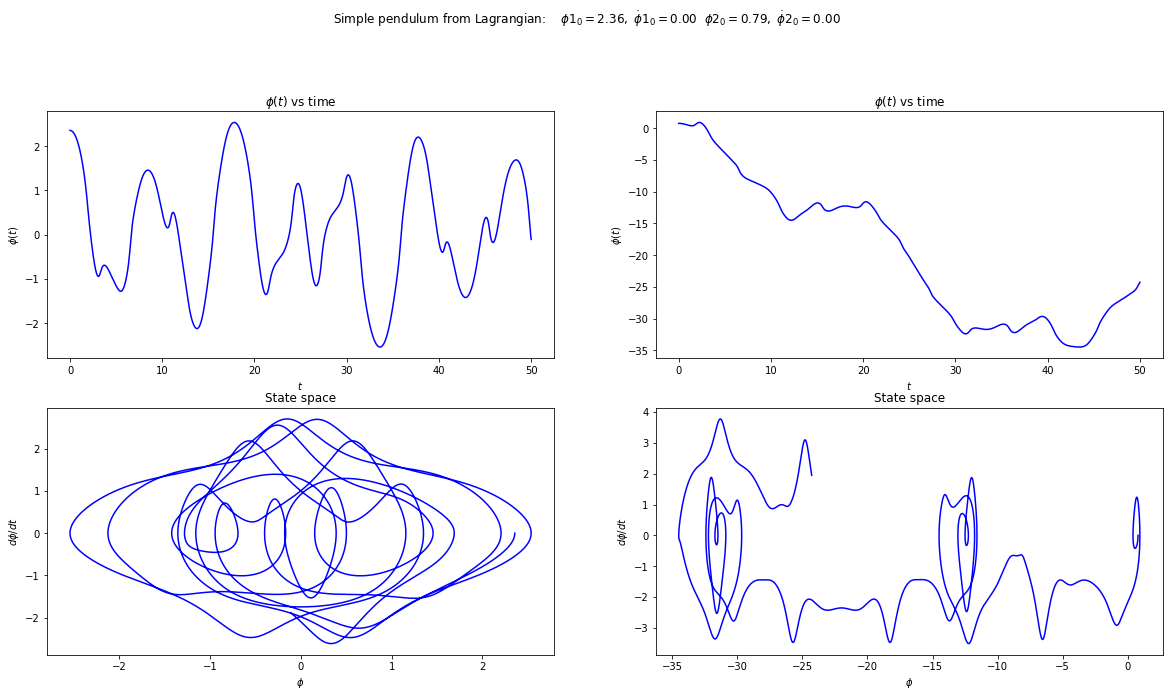

In [52]:
# both plots: same initial conditions
phi1_0 = (3./4.)*np.pi
phi1_dot_0 = 0.

phi2_0 = (1./4.)*np.pi
phi2_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot, = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)


# start the plot!
fig = plt.figure(figsize=(20,10))
overall_title = 'Simple pendulum from Lagrangian:  ' + \
                rf'  $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0:.2f}$' + \
                rf'  $\phi2_0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(2,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi(t)$ vs time', 
            ax=ax_a)    

ax_a = fig.add_subplot(2,2,2)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi(t)$ vs time', 
            ax=ax_a)  

ax_a = fig.add_subplot(2,2,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], phi1_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='State space', 
            ax=ax_a)  

ax_a = fig.add_subplot(2,2,4) 
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2[start : stop], phi2_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='State space', 
            ax=ax_a)  
                              